<a href="https://colab.research.google.com/github/XPROGRAMING/Airbnb_In_NYC_Exploratory_Data/blob/main/Airbnb_In_NYC_Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

In [2]:
dados_airbnb  = pd.read_csv('train.csv')

#Exploring the general information of the dataset

In [3]:
dados_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
dados_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7395 non-null   int64  
 1   name                            7388 non-null   object 
 2   host_id                         7395 non-null   int64  
 3   host_name                       7390 non-null   object 
 4   neighbourhood_group             7395 non-null   object 
 5   neighbourhood                   7395 non-null   object 
 6   latitude                        7395 non-null   float64
 7   longitude                       7395 non-null   float64
 8   room_type                       7395 non-null   object 
 9   price                           7395 non-null   int64  
 10  minimum_nights                  7395 non-null   int64  
 11  number_of_reviews               7395 non-null   int64  
 12  last_review                     65

In [5]:
dados_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.395000e+03,7.395000e+03,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,6570.000000,7395.000000,7395.000000
mean,2.445212e+06,7.926177e+06,40.729261,-73.959528,167.170250,8.526437,50.798377,0.898756,2.635294,133.174983
std,1.690482e+06,7.642370e+06,0.051771,0.036028,278.934106,29.752140,72.706312,1.134519,6.905242,138.331745
min,2.539000e+03,2.571000e+03,40.508680,-74.239860,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.235690e+05,1.600764e+06,40.688760,-73.983995,80.000000,2.000000,4.000000,0.130000,1.000000,0.000000
50%,2.228296e+06,5.081260e+06,40.723220,-73.959270,120.000000,3.000000,18.000000,0.420000,1.000000,81.000000
75%,4.033433e+06,1.198334e+07,40.763825,-73.943620,185.000000,5.000000,67.000000,1.250000,2.000000,273.000000
max,5.482918e+06,4.139808e+07,40.908040,-73.729010,9999.000000,1250.000000,607.000000,13.450000,96.000000,365.000000


#Questions to be answered

##What is the proportion of different room types offered on Airbnb?

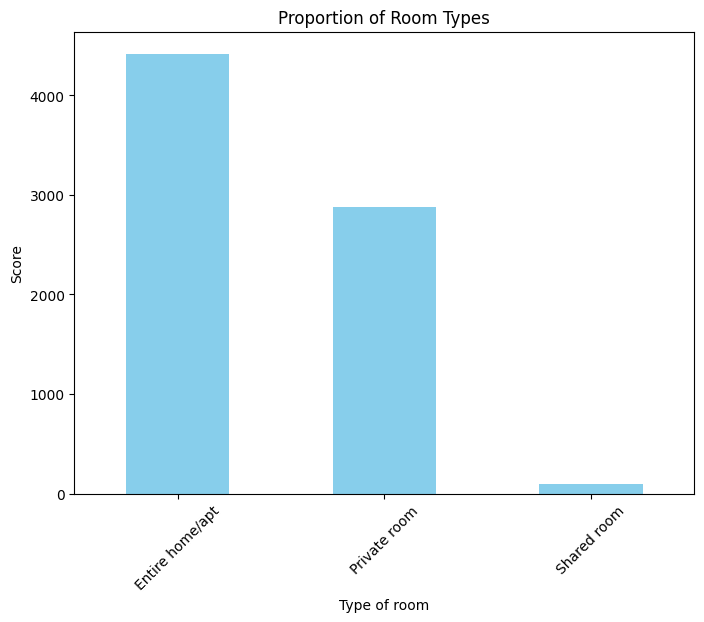

In [11]:
tipo_quarto_counts = dados_airbnb['room_type'].value_counts()
plt.figure(figsize=(8, 6))
tipo_quarto_counts.plot(kind='bar', color='skyblue')
plt.title('Proportion of Room Types')
plt.xlabel('Type of room')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

##What is the price distribution of the different room types?

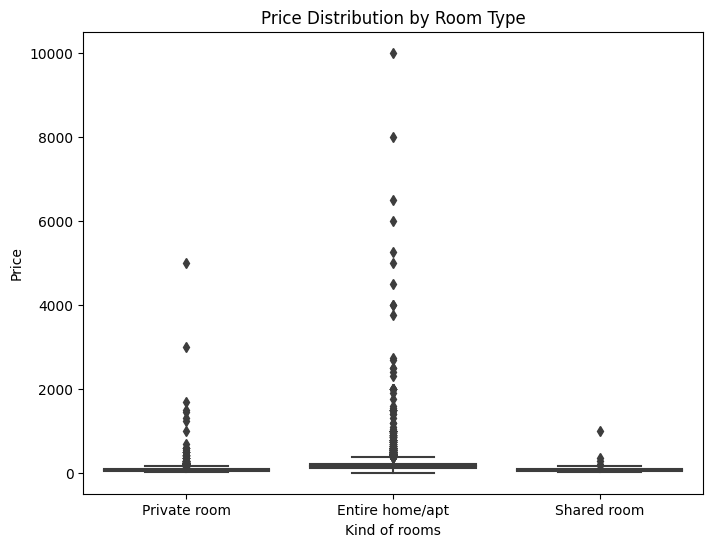

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=dados_airbnb)
plt.title('Price Distribution by Room Type')
plt.xlabel('Kind of rooms')
plt.ylabel('Price')
plt.show()

##What is the relationship between the number of reviews per month and availability throughout the year?

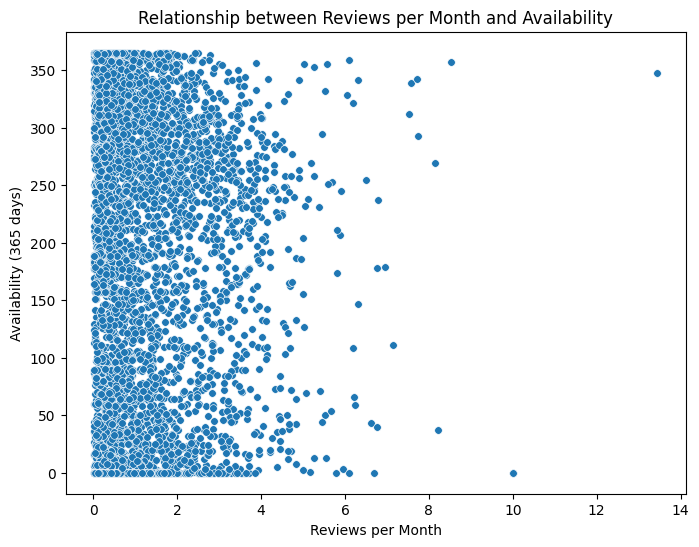

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reviews_per_month', y='availability_365', data=dados_airbnb, s=30)  # Altere o valor de s para ajustar o tamanho dos pontos
plt.title('Relationship between Reviews per Month and Availability')
plt.xlabel('Reviews per Month')
plt.ylabel('Availability (365 days)')
plt.show()

##Which neighborhoods have the highest average number of reviews per month?


In [13]:
reviews_por_bairro = dados_airbnb.groupby('neighbourhood')['reviews_per_month'].mean().sort_values(ascending=False)
top_bairros_reviews = reviews_por_bairro.head(10)
print("Top 10 Neighborhoods with the Highest Average of Reviews per Month:")
print(top_bairros_reviews)

Top 10 Neighborhoods with the Highest Average of Reviews per Month:
neighbourhood
South Ozone Park       4.540000
Springfield Gardens    4.420000
East Elmhurst          3.693636
West Brighton          3.630000
Jamaica Estates        3.470000
Bayside                2.820000
Jamaica                2.505000
Woodlawn               2.490000
Eltingville            2.380000
Woodhaven              2.352500
Name: reviews_per_month, dtype: float64


##Is there any correlation between geographic location and property prices?

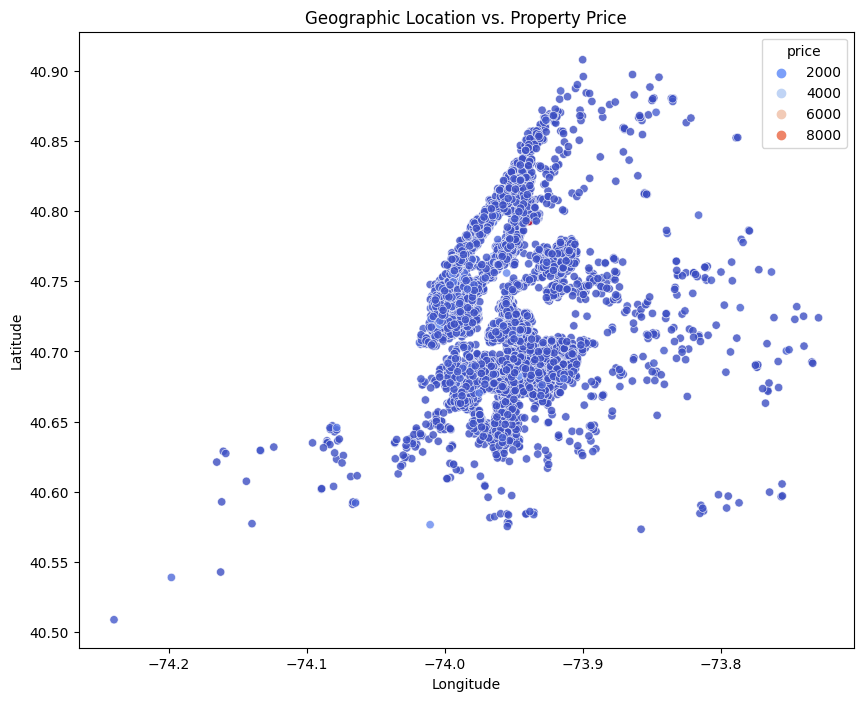

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=dados_airbnb, palette='coolwarm', alpha=0.8)
plt.title('Geographic Location vs. Property Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()